<a href="https://colab.research.google.com/github/lamnguyenkhang31231021496/ueh25_ktltsp_khanglam_st3/blob/main/Bai_tap_thuc_hanh_4_5_NumPy_%26_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bài tập 4-5: Thực hành NumPy & Pandas

In [2]:
pip install numpy pandas matplotlib

1. Chuẩn bị dữ liệu

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(7)

dates = pd.date_range("2024-01-01", periods=240, freq="B")  # ~ 1 năm giao dịch
tickers = ["AAA", "BBB", "CCC"]

rows = []
for t in tickers:
    price = 20 + rng.normal(0, 0.5, len(dates)).cumsum()
    high = price + rng.uniform(0.1, 0.6, len(dates))
    low  = price - rng.uniform(0.1, 0.6, len(dates))
    open_ = price + rng.normal(0, 0.2, len(dates))
    close = price + rng.normal(0, 0.2, len(dates))
    vol = rng.integers(80_000, 450_000, len(dates))
    for d, o, h, l, c, v in zip(dates, open_, high, low, close, vol):
        rows.append({"date": d, "ticker": t, "open": float(o), "high": float(h), "low": float(l), "close": float(c), "volume": int(v)})
df = pd.DataFrame(rows).sort_values(["ticker", "date"]).reset_index(drop=True)
df.head()


,date,ticker,open,high,low,close,volume
0,2024-01-01,AAA,20.137473,20.429237,19.401086,19.887517,341161
1,2024-01-02,AAA,19.744536,20.300537,19.873712,20.064799,419313
2,2024-01-03,AAA,20.140461,20.303211,19.689229,20.235586,312316
3,2024-01-04,AAA,19.528801,19.734484,19.281809,19.610388,438056
4,2024-01-05,AAA,19.427069,19.771511,18.949574,19.517306,247415


1.1. Tạo bảng lợi nhuận hàng ngày

In [4]:
aaa = df[df["ticker"]=="AAA"].copy()
close_np = aaa["close"].to_numpy()

# TODO: tính returns_np dạng NumPy
# Gợi ý: dùng slicing 1 bước cho t và t-1
returns_np = np.empty_like(close_np)
returns_np[0] = 0.0
returns_np[1:] = (close_np[1:] / close_np[:-1]) - 1.0

returns_np[:10]

array([ 0.        ,  0.00891422,  0.0085118 , -0.03089596, -0.00474656,
       -0.02215868, -0.00484805,  0.05299601, -0.04326962,  0.00086264])

1.2. Chuẩn hóa Z-score

In [5]:
def zscore(x: np.ndarray) -> np.ndarray:
    mu = x.mean()
    sigma = x.std(ddof=0)
    if sigma == 0:
        return np.zeros_like(x)
    return (x - mu) / sigma

z_returns = zscore(returns_np)
z_returns[:10]

array([ 0.0726263 ,  0.18092048,  0.17603166, -0.30271245,  0.01496281,
       -0.19656778,  0.01372991,  0.7164469 , -0.45303344,  0.08310604])

2. Pandas: lọc, chọn cột, điều kiện

2.1. Chọn khoảng ngày

In [6]:
mask_q2 = (aaa["date"] >= "2024-04-01") & (aaa["date"] <= "2024-06-30")
aaa_q2 = aaa.loc[mask_q2].copy()

aaa_q2["ret"] = aaa_q2["close"].pct_change().fillna(0.0)
aaa_q2.head()

,date,ticker,open,high,low,close,volume,ret
65,2024-04-01,AAA,12.537766,12.788464,12.327171,12.626708,352445,0.000000
66,2024-04-02,AAA,13.015345,13.643336,12.950315,12.677552,398255,0.004027
67,2024-04-03,AAA,13.826495,14.064972,13.373121,13.768151,323241,0.086026
68,2024-04-04,AAA,13.153278,13.325782,12.612112,12.886812,387001,-0.064013
69,2024-04-05,AAA,12.913741,13.008716,12.466845,12.491619,308159,-0.030666


2.2. Boolean indexing nâng cao

In [7]:
thr = aaa["volume"].quantile(0.75)
aaa["big_vol"] = aaa["volume"] > thr

winners_big_vol = aaa[(aaa["big_vol"]) & (aaa["close"].pct_change().fillna(0)>0)]
winners_big_vol.head()

,date,ticker,open,high,low,close,volume,big_vol
1,2024-01-02,AAA,19.744536,20.300537,19.873712,20.064799,419313,True
7,2024-01-10,AAA,19.206547,19.830506,19.256074,19.998821,399308,True
9,2024-01-12,AAA,18.840026,19.195832,18.446104,19.149985,391429,True
10,2024-01-15,AAA,19.167185,19.456929,18.886307,19.169595,433586,True
12,2024-01-17,AAA,19.396060,19.793088,19.327729,19.804463,447418,True


3. Rolling window & chỉ báo cơ bản

3.1. SMA/EMA

In [8]:
aaa["sma_10"] = aaa["close"].rolling(10, min_periods=10).mean()
aaa["sma_20"] = aaa["close"].rolling(20, min_periods=20).mean()
aaa["ema_12"] = aaa["close"].ewm(span=12, adjust=False).mean()
aaa["ema_26"] = aaa["close"].ewm(span=26, adjust=False).mean()
aaa.tail()

,date,ticker,open,high,low,close,volume,big_vol,sma_10,sma_20,ema_12,ema_26
235,2024-11-25,AAA,2.490763,2.807453,2.053808,2.480715,337963,False,2.447139,3.504189,2.839056,3.791315
236,2024-11-26,AAA,2.833885,3.132832,2.561502,2.565547,245687,False,2.386851,3.340399,2.796978,3.700518
237,2024-11-27,AAA,2.797916,3.142667,2.742833,2.866865,220408,False,2.334217,3.176084,2.807730,3.638766
238,2024-11-28,AAA,2.902738,3.135792,2.380388,2.718308,223533,False,2.392796,3.030763,2.793973,3.570584
239,2024-11-29,AAA,2.170370,2.479771,1.602469,2.054852,199168,False,2.392355,2.900717,2.680262,3.458307


3.2. RSI đơn giản

In [9]:
def rsi_simple(s: pd.Series, window:int=14) -> pd.Series:
    delta = s.diff()
    gain = delta.where(delta>0, 0.0)
    loss = -delta.where(delta<0, 0.0)
    avg_gain = gain.rolling(window, min_periods=window).mean()
    avg_loss = loss.rolling(window, min_periods=window).mean()
    rs = avg_gain / avg_loss.replace(0, np.nan)
    out = 100 - (100/(1+rs))
    return out.fillna(0.0)

aaa["rsi_14"] = rsi_simple(aaa["close"], 14)
aaa[["date","close","rsi_14"]].tail(12)

,date,close,rsi_14
228,2024-11-14,2.132518,13.002591
229,2024-11-15,2.059264,13.176760
230,2024-11-18,2.268368,16.276130
231,2024-11-19,1.758172,10.015219
232,2024-11-20,1.849443,12.684940
233,2024-11-21,2.168737,21.795930
234,2024-11-22,3.192540,36.000820
235,2024-11-25,2.480715,34.061075
236,2024-11-26,2.565547,40.071888
237,2024-11-27,2.866865,43.089693


4. Resample & Time Series

4.1. Tuần hóa dữ liệu

In [12]:
aaa_ts = aaa.set_index("date")

weekly = pd.DataFrame({
    "open": aaa_ts["open"].resample("W-FRI").first(),
    "high": aaa_ts["high"].resample("W-FRI").max(),
    "low": aaa_ts["low"].resample("W-FRI").min(),
    "close": aaa_ts["close"].resample("W-FRI").last(),
    "volume": aaa_ts["volume"].resample("W-FRI").sum(),
})
weekly.head()

,open,high,low,close,volume
date,,,,,
2024-01-05,20.137473,20.429237,18.949574,19.517306,1758261
2024-01-12,18.980956,19.830506,18.270515,19.149985,1868743
2024-01-19,19.167185,19.793088,18.465862,18.790742,1426209
2024-01-26,19.382836,19.721694,16.322081,16.926895,1342982
2024-02-02,15.736226,16.081607,14.834701,15.504501,1355035


4.2. Cumulative Return & Drawdown

In [13]:
ret = aaa_ts["close"].pct_change().fillna(0.0)
nav = (1+ret).cumprod()
roll_max = nav.cummax()
drawdown = (nav - roll_max) / roll_max
max_dd = drawdown.min()
float(max_dd)

-0.9131148668401512

5. GroupBy, Pivot & Correlation

5.1. GroupBy

In [14]:
df["ret"] = df.groupby("ticker")["close"].pct_change().fillna(0.0)
by_ticker = df.groupby("ticker")["ret"].mean().sort_values(ascending=False)
by_ticker

,ret
ticker,
BBB,0.001643
CCC,-0.000276
AAA,-0.005978


5.2. Pivot giá & ma trận tương quan

In [15]:
prices_wide = df.pivot(index="date", columns="ticker", values="close")
corr = prices_wide.pct_change().dropna().corr()
corr

ticker,AAA,BBB,CCC
ticker,,,
AAA,1.000000,-0.007072,0.02170
BBB,-0.007072,1.000000,0.02173
CCC,0.021700,0.021730,1.00000


6. Merge/Join

6.1. Ghép dữ liệu

In [16]:
meta = pd.DataFrame({
    "ticker": ["AAA","BBB","CCC"],
    "sector": ["Tech","Finance","Energy"]
})
df_meta = df.merge(meta, on="ticker", how="left")

sector_ret = (
    df_meta.assign(ret=df_meta.groupby("ticker")["close"].pct_change().fillna(0.0))
    .groupby("sector")["ret"].mean()
    .sort_values(ascending=False)
)
sector_ret

,ret
sector,
Finance,0.001643
Energy,-0.000276
Tech,-0.005978


7. Áp dụng hàm tự việt (apply)

7.1. Thanh lọc outlier đơn giản

In [17]:
def clip_pct(s: pd.Series, thr: float=0.1) -> pd.Series:
    return s.clip(lower=-thr, upper=thr)

df["ret_clipped"] = (
    df.groupby("ticker")["ret"]
    .apply(lambda s: clip_pct(s, thr=0.1))
    .reset_index(level=0, drop=True) # Reset index to match the original DataFrame
)
df[["ticker","date","ret","ret_clipped"]].head(12)

,ticker,date,ret,ret_clipped
0,AAA,2024-01-01,0.000000,0.000000
1,AAA,2024-01-02,0.008914,0.008914
2,AAA,2024-01-03,0.008512,0.008512
3,AAA,2024-01-04,-0.030896,-0.030896
4,AAA,2024-01-05,-0.004747,-0.004747
5,AAA,2024-01-08,-0.022159,-0.022159
6,AAA,2024-01-09,-0.004848,-0.004848
7,AAA,2024-01-10,0.052996,0.052996
8,AAA,2024-01-11,-0.043270,-0.043270
9,AAA,2024-01-12,0.000863,0.000863


8. Vẽ biểu đồ (matplotlib, không đặt màu)

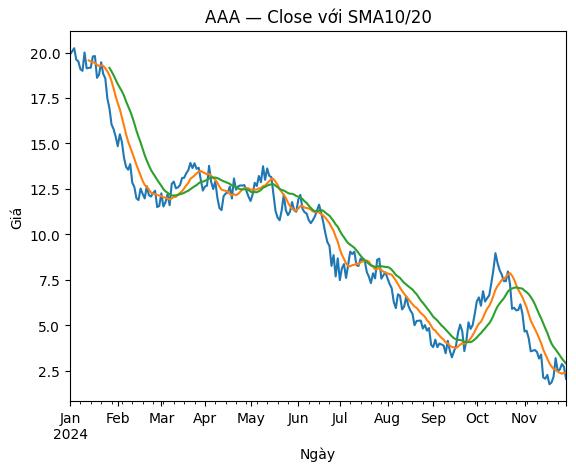

In [18]:
plt.figure()
aaa_plot = aaa.set_index("date")
aaa_plot["close"].plot(title="AAA — Close với SMA10/20")
aaa_plot["sma_10"].plot()
aaa_plot["sma_20"].plot()
plt.xlabel("Ngày")
plt.ylabel("Giá")
plt.show()

9. Mini-Project (tùy chọn)

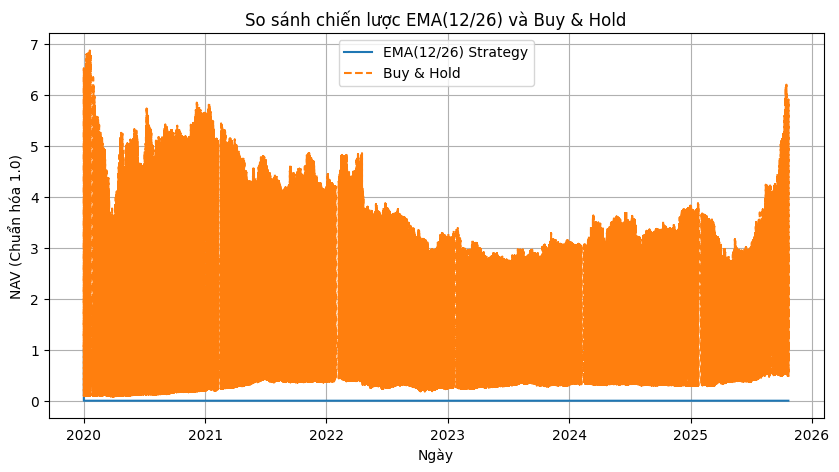

Max Drawdown của chiến lược EMA(12/26): -100.00%


In [21]:
# Mini Project: EMA(12/16) Strategy vs Buy & Hold
# Author: Lâm Nguyên Khang
# ---------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu giá cổ phiếu
data = pd.read_excel("VN30_preprocessed-2.xlsx")

# 2. Chuẩn hóa dữ liệu
# Đổi tên cột
data = data.rename(columns={
    "Date": "date",
    "Price": "close"
})

# Chuyển kiểu dữ liệu ngày và sắp xếp tăng dần
data["date"] = pd.to_datetime(data["date"], errors="coerce")
data = data.sort_values("date").reset_index(drop=True)

# 3. Tính toán EMA (Exponential Moving Average)
data["ema_12"] = data["close"].ewm(span=12, adjust=False).mean()
data["ema_26"] = data["close"].ewm(span=26, adjust=False).mean()

# 4. Tín hiệu giao dịch: 1 = nắm giữ (EMA12 > EMA26), 0 = không
data["signal"] = (data["ema_12"] > data["ema_26"]).astype(int)

# 5. Tính phần trăm thay đổi hằng ngày (daily return)
data["daily_ret"] = data["close"].pct_change().fillna(0)

# 6. Tính lợi nhuận chiến lược EMA
data["strategy_ret"] = data["signal"].shift(1).fillna(0) * data["daily_ret"]

# 7. Tính NAV (Net Asset Value)
data["strategy_nav"] = (1 + data["strategy_ret"]).cumprod()
data["bh_nav"] = (1 + data["daily_ret"]).cumprod()

# 8. Vẽ biểu đồ so sánh
plt.figure(figsize=(10,5))
plt.plot(data["date"], data["strategy_nav"], label="EMA(12/26) Strategy")
plt.plot(data["date"], data["bh_nav"], label="Buy & Hold", linestyle="--")
plt.title("So sánh chiến lược EMA(12/26) và Buy & Hold")
plt.xlabel("Ngày")
plt.ylabel("NAV (Chuẩn hóa 1.0)")
plt.legend()
plt.grid(True)
plt.show()

# 9. Tính Max Drawdown của chiến lược EMA
s_nav = data["strategy_nav"]
max_dd = ((s_nav / s_nav.cummax()) - 1).min()
print(f"Max Drawdown của chiến lược EMA(12/26): {max_dd:.2%}")